<div class="alert alert-block alert-warning">
<b>NOTE:</b> <br>
To pass this Project coding is needed but you need to answer some of the given Question logically? You will find the Questions in the middle of this Project soon dont worry!!!! Go on 
</div>


# Introduction
Lifetimes can be used to analyze users based on a few assumption:
1. Users interacts when they are `alive`
2. Users under study may `die` after some period of time
`alive` and `die` => most abstract terms: own definition of `alive` and `die` (they are used similarly to `birth` and `death` in survival analysis) <br>
Whenever we have individuals repeating occurrences, we can use Lifetimes to help understand user behaviour

# Applications
Consider these applications to understand more:

* Predicting how often a visitor will return to your website. (Alive = visiting, Die = decided website wasn't for them)
* Understanding how frequently a patient may return to a hospital. (Alive = visiting, Die = maybe patient moved to a new city, or became deceased)
* Predicting individuals who have churned from an app using only their usage history. (Alive = logins, Die = removed app)
* `Predicting repeat purchases from a customer. (Alive = actively purchasing, Die = became disinterested with your product)`
* `Predicting lifetime value of your customers`

Assumptions about purchase event process and time that customer stays active(alive)
* These five assumptions are given in words here.I will attempt to convince that these assumptions are sensible, and then present formalized mathematics of the model

`Individual Customer`
1. `Poisson Purchases`:While alive,each customer makes purchases according to a Poisson process with rate `λ`
2. `Exponential Lifetime`: Each customer remains alive for a lifetime which has an exponentially distributed duration with death rate `μ`

`Heterogeneity Across Customers`<br>

3. `Individuals'Purchasing Rates Distributed Gamma`:Purchasing rate `λ` for different customers is distributed according to a gamma distribution across population of customers<br>
4. `Death Rates Distributed Gamma`:Customer's death rates `μ` are distributed accordingto a different gamma distribution across customers <br>
5. `Rates λ and μ Are Independent`:Purchasing rates `λ` and death rates `μ` are distributed independently of each other


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


Above are all the data bases we have but we are selecting required database for CLV problem

These are the databases which we will use
* olist_orders_dataset.csv
* olist_customers_dataset.csv
* olist_order_payments_dataset.csv

In [2]:
# Import required library
# library for ploting

#library to ignore warnings [dont show them to me ]


<div class="alert alert-block alert-info">
<b>Tip:</b><br> 
`%matplotlib inline` function is used to render static matplotlib plots within Jupyter notebook<br> 
Try replacing `inline` part with `notebook` to get zoom-able & resize-able plots, easily
</div>


In [3]:
#load these 3 data sets named as olist_orders_dataset.csv,olist_customers_dataset.csv,olist_order_payments_dataset.csv
orders = 
customer =
payments = 

In [4]:
# merge orders dataset with customer dataset on 'customer_id' type how outer save it in a variable say merged_df1
merged_df1 =
# merge merged_df1 with payments data set on order_id type hoe outer
merged_df1 =
# reset index of merged_df1
merged_df1.
# see top 5 rows of dataset merged_df1
merged_df1.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00


In [5]:
# find out if any null values are in dataset merged_df1
merged_df1.

index                               0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
dtype: int64

In [6]:
# now select only required columns which you think will be usefull for this usecase and save then as a list in req_cols variable
## Hint: column maybe 'customer_unique_id','order_purchase_timestamp','payment_value'
req_cols = 

# limit merged_df1 to only required columns -- req_cols
merged_df1 = 

In [7]:
# see top 5 rows of limited dataset merged_df1
merged_df1

,customer_unique_id,order_purchase_timestamp,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,18.12
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2.00
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,18.59
3,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,179.12


In [8]:
# chech for the shape of merged_df1
merged_df1

(103887, 3)

In [9]:
# check if any null value exist
merged_df1.

customer_unique_id          0
order_purchase_timestamp    0
payment_value               1
dtype: int64

In [10]:
# use .info() function to get a concise summary of dataframe
merged_df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_unique_id        103887 non-null  object 
 1   order_purchase_timestamp  103887 non-null  object 
 2   payment_value             103886 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [11]:
# change order_purchase_timestamp column which is string data type to datetime data type
## Hint: use pd.to_datetime()
merged_df1['order_purchase_timestamp'] = 

# extract date from merged_df1['order_purchase_timestamp']
## Hint: use dt.date
merged_df1['order_date'] = 

# convert string Date time into Python Date time object
## Hint: pd.to_datetime
merged_df1['order_date'] = 

# check first 5 rows of dataframe
merged_df1

,customer_unique_id,order_purchase_timestamp,payment_value,order_date
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,18.12,2017-10-02
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2.00,2017-10-02


In [ ]:
# use .info() function to get a concise summary of dataframe
merged_df1

In [12]:
# extract only required columns from merged_df1 which are 'customer_unique_id','payment_value','order_date'
## Hint: make a list of requried columns
req_cols2 = 

# assign required limited column dataframe to new variable transaction_data
transaction_data = 

# check for top 5 rows of dataset transaction_data
transaction_data

,customer_unique_id,payment_value,order_date
0,7c396fd4830fd04220f754e42b4e5bff,18.12,2017-10-02
1,7c396fd4830fd04220f754e42b4e5bff,2.00,2017-10-02


In [13]:
# drop null value if any use inplace=True
transaction_data

In [14]:
#rename transaction_data columns to 'id','price','date'
transaction_data.columns =

<div class="alert alert-block alert-warning">
<b>Information:</b> <br>
Pandas profiling package computes the following statistics (in genral): <br>
* Essentials:
    * Type
    * Unique Values
    * Missing Values <br>
* Descriptive Stats <br>
* Quantile Stats <br>
* Correlations <br>
* Most Frequent Values <br>
* Histogram   <br>
</div>

To analyse transaction_data and other 3 dataset quickly let use pandas_profiling which is a library
* Will use ProfileReport() this is a method, which generate a basic report on input DataFrame

In [15]:
# import pandas_profiling library
import 

In [16]:
#see orders dataset report using ProfileReport() method
orders.

In [17]:
#see customers dataset report using ProfileReport() method
customers.

In [18]:
# payments dataset profile report
payments.

In [ ]:
# transaction_data dataset profile report
transaction_data.

`Report can also be exported into an interactive HTML file with`

In [19]:
# say you want payment dataset report to be stored in html format
profile = payments.profile_report(title='Payment Report')
profile.to_file(outputfile="any path/Payment_report.html")

## After Extracting only requried columns from datasets

## transaction_data
This dataset will help in understanding recency and frequency
* recency (R)
* frequency (F)
* monetary value (M)

In [20]:
# re-check for null values in transaction_data
transaction_data.

id       0
price    0
date     0
dtype: int64

price = spend

In [21]:
# find the value count per col using for loop


*** Value count column:[[id]] ***
9a736b248f67d166d2fbb006bcb877c3    33
8af7ac63b2efbcbd88e5b11505e8098a    29
569aa12b73b5f7edeaa6f2a01603e381    26
f9ae226291893fda10af7965268fb7f6    23
2524dcec233c3766f2c2b22f69fd65f4    22
                                    ..
9cf5e99801fa1841630de46050cb0444     1
42c8ccbe558d063718d19cff01505af9     1
c563cc0d1514b8f7fa9b4a40f158fca0     1
738b1b04a2a76c384c01706519d0338f     1
60350aa974b26ff12caad89e55993bd6     1
Name: id, Length: 96095, dtype: int64

*** Value count column:[[price]] ***
50.00      324
20.00      274
100.00     255
77.57      250
35.00      165
          ... 
150.35       1
1147.50      1
665.98       1
290.40       1
441.16       1
Name: price, Length: 29077, dtype: int64

*** Value count column:[[date]] ***
2017-11-24    1214
2017-11-25     538
2017-11-27     420
2017-11-26     411
2017-11-28     393
              ... 
2018-09-13       1
2016-09-04       1
2016-09-05       1
2018-09-20       1
2018-08-31       1
Name: dat

In [55]:
# see data types of transaction_data
transaction_data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103886
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   id      103886 non-null  object        
 1   price   103886 non-null  float64       
 2   date    103886 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.2+ MB


# EDA of Transaction data
### Price Distribution
Aim here is to analyze by a financial bias,trying to understand Price distributions

In [22]:
# view some basic statistical details like percentile, mean, std etc. of price column
transaction_data

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: price, dtype: float64

Cool! It gives to us a clear price distributions and now we know that
* Mean Value is: 154.100380
* Standard Deviation is: 217.494064

In [80]:
# this figure size(can be used as global) for all figures which we will plot after executing this shell
plt.rcParams['figure.figsize'] = (14,4) 
plt.rcParams["figure.dpi"] = 100
sns.set_context("poster",font_scale=.5,rc={"grid.linewidth":5})

[Understand how subplot works](https://stackoverflow.com/questions/24337813/how-does-subplot-work-and-what-is-the-difference-between-subplot121-and-subplo#24337903)<br>
[Why and how log transform](https://calcworkshop.com/linear-regression/log-transformation/)<br>

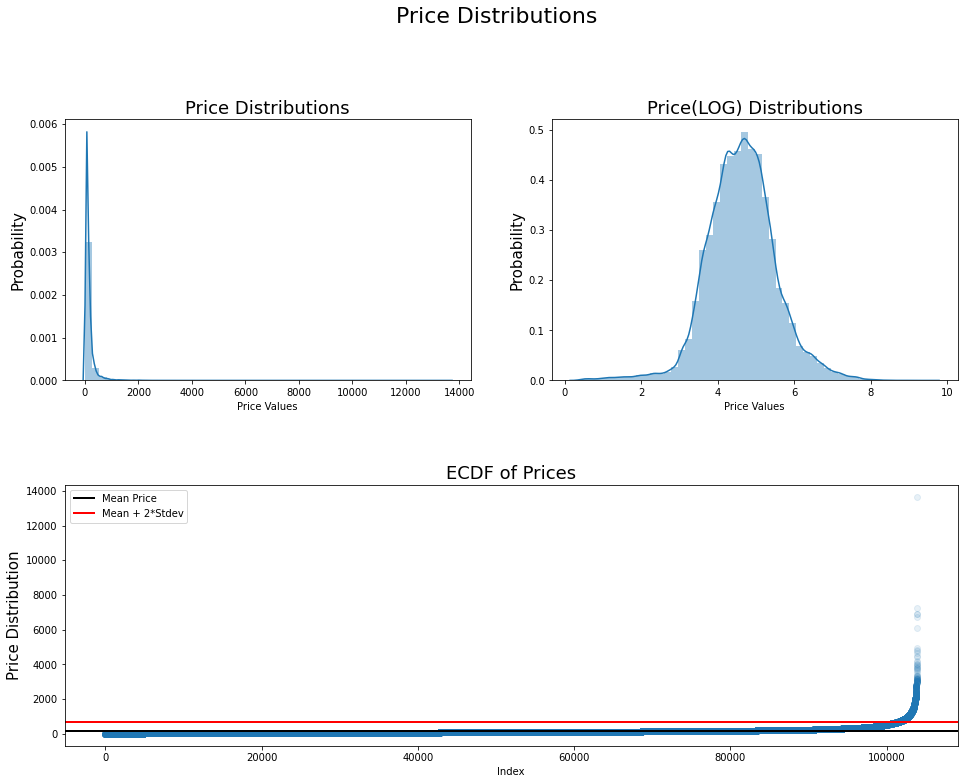

In [24]:
# import seaborn library -- plotting
import seaborn as sns


#1
## assign some figuresize
plt.figure(figsize=(-,-))
## assign suptitle 'Price Distributions' with some fontsize
plt.suptitle('-',fontsize=-)
plt.subplot(221)
## plot distplot of price column
g = sns.distplot(transaction_data)
g.set_title("Price Distributions",fontsize=18)
g.set_xlabel("Price Values")
g.set_ylabel("Probability",fontsize=15)

#2
plt.subplot(222)
## plot distplot of price column with log transform 
g1 = sns.distplot(np.log(transaction_data+1.5))
g1.set_title("Price(LOG) Distributions",fontsize=18)
g1.set_xlabel("Price Values")
g1.set_ylabel("Probability",fontsize=15)

#3 process to plot ECDF graph see it and understand it 
plt.subplot(212)
g2 = plt.scatter(range(transaction_data.shape[0]),np.sort(transaction_data['price'].values),alpha=.1)
g2= plt.title("ECDF of Prices",fontsize=18)
g2 = plt.xlabel("Index")
g2 = plt.ylabel("Price Distribution",fontsize=15)
# will work if price have -ve value in it for now we dont have
g2 = plt.axhline(transaction_data[transaction_data['price'] != -1]['price'].mean(), color='black',label='Mean Price',linewidth=2)
g2 = plt.axhline(transaction_data[transaction_data['price'] != -1]['price'].mean() + (2.5*transaction_data[transaction_data['price'] != -1]['price'].std()),
                 color='red',label='Mean + 2*Stdev',linewidth=2)
g2 = plt.legend()

plt.subplots_adjust(hspace=0.4,top=0.85)
plt.show()

`ECDF` is an estimator of `CDF`Cumulative Distribution Function
* ECDF essentially allows you to plot a feature of your data in order from least to greatest and see whole feature as if is distributed across data set

In above graph,setting as outliers all product prices that cross bound of Mean(154.100380) + 2.5x the Stdev(217.494064)


Most of Price is 0

In [56]:
#exclude all thouse data points where price is 0, dont conside them
transaction_data = 

In [57]:
# view some basic statistical details like percentile, mean, std etc. of price column 
transaction_data

count    103877.000000
mean        154.113732
std         217.498755
min           0.010000
25%          56.820000
50%         100.000000
75%         171.840000
max       13664.080000
Name: price, dtype: float64

# How to Find`AGE` of customer ?
First step is to compare first and last order dates in order to calculate customer age
* Use months to measure time

Will use transaction_data

<div class="alert alert-block alert-warning">
<b>Point to remember:</b> <br>
See price column as spending
</div> 

In [58]:
# see top 5 rows of transaction_data 
transaction_data

,id,price,date
0,7c396fd4830fd04220f754e42b4e5bff,18.12,2017-10-02
1,7c396fd4830fd04220f754e42b4e5bff,2.00,2017-10-02


[Why as_index=False](https://stackoverflow.com/questions/41236370/what-is-as-index-in-groupby-in-pandas#41237258) <br>
[How to use Lambda](https://www.w3schools.com/python/python_lambda.asp)

In [85]:
#import ceil and maximum using numpy for some mathematical computations 
from numpy ---
 
#transaction_data groupby transaction_data id column as_index as False
group_by_customer = 


# try to observe thi code and comment what is going on here
##NOTE: as this is from some of the main part of this project so please give some good ammount of time to understand it
customers = group_by_customer['date'].agg(lambda x: (x.max() - x.min()))
customers['age'] = maximum(customers['date'].apply(lambda x: ceil(x.days/30)),1.0) # monthly
customers = customers.drop(columns='date')
customers.head()

,id,age
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0
2,0000f46a3911fa3c0805444483337064,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1.0
4,0004aac84e0df4da2b147fca70cf8255,1.0


A tip is you are finding age of the customer here <br>
Formula to calculate age is `last buy time - first buy time`

Q - Ask yourself and understand, what is happning inside above lambda?? <br>
Q - Why to use ceil or maxium?? <br>
Q - Why using agg and apply? <br>
Q - Why only /30, can we change it, why whynot? <br>

To pass this Project coding is needed but you need to answer above given Question logically?

## `Your Answers`:"---- "

In [65]:
# count frequency of unique values in customers.age
customers

1.0     94555
2.0       323
3.0       212
4.0       171
5.0       135
6.0       131
7.0       110
8.0        93
10.0       72
9.0        72
12.0       53
11.0       52
14.0       27
13.0       27
15.0       22
16.0       13
18.0       10
17.0       10
20.0        3
22.0        1
21.0        1
Name: age, dtype: int64

### `Assuming a customer will never return (has churned) after 12 weeks of inactivity,calculating CLV`

* Not hiding any stuff here because again this is from some of the most important part of this project which one should understand and it is bit hard if one do not have domain knowledge

I request you to understand bellow code line after line 

Q - Please try to understand what this bellow line of code is doing, as this is somthing you will use in daily life, comment your understanding as an answer
* group_by_customer['date'].max()['date'].apply(lambda x: (cutoff_date - x) > twelve_weeks)

Q - What you are getting out of the variable name `dead`, `churn`, `spend`, and `clv_aa` <br>
Q - Extract set of formulas which are being used in finding these churn, spend and etc and write them mathematically <br>
Q - Again share your understanding <br>

To pass this Project coding is needed but you need to answer above given Question logically?

In [66]:
#import timedelta from datetime

#setting a time period if 12 weeks to eval
twelve_weeks = timedelta(weeks=12) #time
#last date available in dataset
cutoff_date = transaction_data['date'].max()

# Hint is one is considered kind of dead if this condition is true
dead = group_by_customer['date'].max()['date'].apply(lambda x: (cutoff_date - x) > twelve_weeks)
churn = dead.sum() / customers['age'].sum() # use of above customers dataset's age col
spend = transaction_data['price'].sum() / customers['age'].sum()
 
clv_aa = spend/churn 
print(f'Customer CLV maybee in $: {clv_aa}')

Customer CLV maybee in $: 181.96862917159223


Observe above result, analytic aggregate CLV model predicts customer CLV to be currency value of 181.96 for each customer

## `Your Answers`:"---- "

# Cohort-based CLV (Analytic)
Grouping customers by their `cohorts(group of people who share a characteristic)`, under assumption that customers within a cohort spend similarly
* Will calculate CLV for each cohort (assuming every person is unique i.e. Every cohort is unique)

In [67]:
# Now that we have used merge enough time before, this time we are not asking to write the code for merging, this time we want you to
## Explain this line in words 
customers_analytic = customers.merge(group_by_customer['price'].sum(),on='id')

#again write mathematical formula being used in finding clv of each customer
customers_analytic['clv'] = customers_analytic['price'] / customers_analytic['age'] / churn
customers_analytic.head()

,id,age,price,clv
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,141.90,167.410257
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.19,32.078118
2,0000f46a3911fa3c0805444483337064,1.0,86.22,101.720313
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,43.62,51.461842
4,0004aac84e0df4da2b147fca70cf8255,1.0,196.89,232.286156


Each customer has their own CLV prediction now

## `Your Answers`:"---- "

# Lifetimes Package

In [68]:
# installing Lifetimes
!pip install lifetimes

In ecommerce data science almost everything revolves around four or five key metrics, which are really all derivatives of 
* `recency` (R) 
* `frequency` (F)
* `monetary value` (M)

These form the basis of the popular `RFM model` which has been used in marketing for decades
* The other two metrics that matter in ecommerce are 
    * `tenure/age` (T) - how long the customer has been a customer and 
    * `latency` - number of days between their orders
* It’s very easy to calculate these manually, but

We’re going to use `Cameron Davidson-Pilon’s superb Lifetimes package` as it does this easily and gives you access to some models to analyse data

In [70]:
# load summary_data_from_transaction_data module from lifetimes.utils
from lifetimes.utils 

# we  have used same line of code before this time
## Explain what this line of code is doing
cutoff_date = transaction_data['date'].max()
summary = summary_data_from_transaction_data(transaction_data,'id','date',
                                             observation_period_end=cutoff_date,monetary_value_col='price')

#print first 5 rows of dataframe returned by summary_data_from_transaction_data()
summary.head()

,frequency,recency,T,monetary_value
id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,160.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,163.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,586.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,370.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,337.0,0.0


Pandas dataframe of transaction_data and defining columns that contain id and date, Lifetimes helper have calculate frequency, recency and Tenure (or age) for us.<br>
See that summary_data_from_transaction_data identified each unique customer and has calculated their Recency, Frequency and T.<br>
Getting to grips with what Lifetimes is doing: <br>
* `Frequency` 
    * measures number of repeat orders a customer has placed
    * a value of zero indicates a new customer who has placed a single order
    * a value of 1 indicates a customer placing their second order and so on
* `Recency`
    * represents age of customer in days when they made their most recent purchase and is calculated from their tenure minus number of days since their last order
    * a recency of zero indicates a newly acquired customer 
* `T`
    * measures tenure of customer in days 
    * how many days have elapsed since their first order
    
Now basic customer data set up,fit a model

## `Your Answers`:"---- "

# Predictive CLV using statistical models
This class of models is known as “Buy Til You Die” (BTYD), because model learns to predict how long a customer will continue to purchase until they churn.<br>
Specifically, a BTYD model will fit a statistical model to predict number of transactions by customer, then fit a secondary model to predict revenue for any transaction.<br>
Fortunately, training these models to learn from data is straightforward if you use [Lifetimes package](https://lifetimes.readthedocs.io/en/latest/) in Python. <br>
Note that below this is just one of many available BTYD models, and others may perform better on your data.<br>
# Fitting Beta-Geometric Negative Binomial Distribution Model
Our basic customer data set up, we can fit a model. 
* We will use `BetaGeoFitter Model` => It provides `Beta-Geometric Negative Binomial Distribution Model` that is common to so-called `“Buy ‘Til You Die” customer lifetime Models`
* To fit model,simply pass in dataframe columns containing `Frequency`, `Recency` and `Tenure` data.

from lifetimes import ModifiedBetaGeoFitter

mbgf = ModifiedBetaGeoFitter(penalizer_coef=0.5)
mbgf.fit(summary['frequency'],summary['recency'],summary['T'])
mbgf.summary

`penalizer_coef` => coefficient applied to an l2 norm on the parameters

In [71]:
# import BetaGeoFitter using lifetimes
from 

bgf = BetaGeoFitter(penalizer_coef=0.0) # penalizer_coef => coefficient applied to an L2 norm on parameters
# fit bgf on 'frequency','recency','T' of summary


<lifetimes.BetaGeoFitter: fitted with 96093 subjects, a: 2.75, alpha: 42.77, b: 0.39, r: 0.01>

Predicting number of `transactions expected from each customer over course of their lifetime`

In [72]:
t = 30 #times to calculate the expectation for

#new column 'predicted_purchases', predict using bgf by taking => t,summary['frequency'],summary['recency'],summary['T'] in consideration
summary['predicted_purchases'] = bgf.predict()

#see top 5 rows
summary

,frequency,recency,T,monetary_value,predicted_purchases
id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,160.0,0.0,0.001627
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,163.0,0.0,0.001604
0000f46a3911fa3c0805444483337064,0.0,0.0,586.0,0.0,0.000547
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,370.0,0.0,0.000824
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,337.0,0.0,0.000893


above in table are lifetime predicted_purchases

To map this back to CLV, we must estimate revenue for each transaction by fitting spend data to Gamma-Gamma model:



In [73]:
# GammaGammaFitter is used to estimate average monetary value of customer transactions
# import GammaGammaFitter using lifetimes
from

# new data frame which have summary['monetary_value'] > 0
returning_customers_summary = 

# model instance
ggf = GammaGammaFitter(penalizer_coef=0)
# fit model on dataset returning_customers_summary', 'frequency' and 'monetary_value' columns
ggf.fit()

# find transaction_spend using conditional_expected_average_profit, see what it takes as input and take .mean() of all
transaction_spend = 

# print transaction_spend

155.13209749486268


According to this model, expected revenue from each transaction is maybee $155.1308398728916

Now it’s possible to calculate CLV

In [74]:
# see first 5 rows of customers_analytic


,id,age,price,clv
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,141.90,167.410257
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.19,32.078118


`Q- What is the diff. between merge and join?`<br>
Your Answer: -----

In [75]:
# join customers_analytic with predicted_purchases column of summary dataframe on id column where join will be inner then drop clv column
customers_pm = 

# formula to find clv
## Comment what you understood with this implementation of formula
## write the mathematical formula for it in answer
customers_pm['clv'] = customers_pm.apply(lambda x: x['predicted_purchases'] * transaction_spend,axis=1)

# see last 5 data points of customers_pm


,id,age,price,predicted_purchases,clv
96088,fffcf5a5ff07b0908bd4e2dbc735a684,1.0,2067.42,0.000636,0.098635
96089,fffea47cd6d3cc0a88bd621562a9d061,1.0,84.58,0.000957,0.148390
96090,ffff371b4d645b6ecea244b27531430a,1.0,112.46,0.000521,0.080897
96091,ffff5962728ec6157033ef9805bacc48,1.0,133.69,0.001568,0.243301
96092,ffffd2657e2aad2907e67c3e9daecbeb,1.0,71.56,0.000596,0.092437


`clv` tells how much this id will spend

In [76]:
# clv is the spending
## But why we are using log here 
## Draw same plot by not using log and write your findings Why we used log here
np.log(customers_pm.clv).describe()

count    96093.000000
mean        -1.710275
std          0.528538
min         -3.099476
25%         -2.116373
50%         -1.776972
75%         -1.381629
max          4.119705
Name: clv, dtype: float64

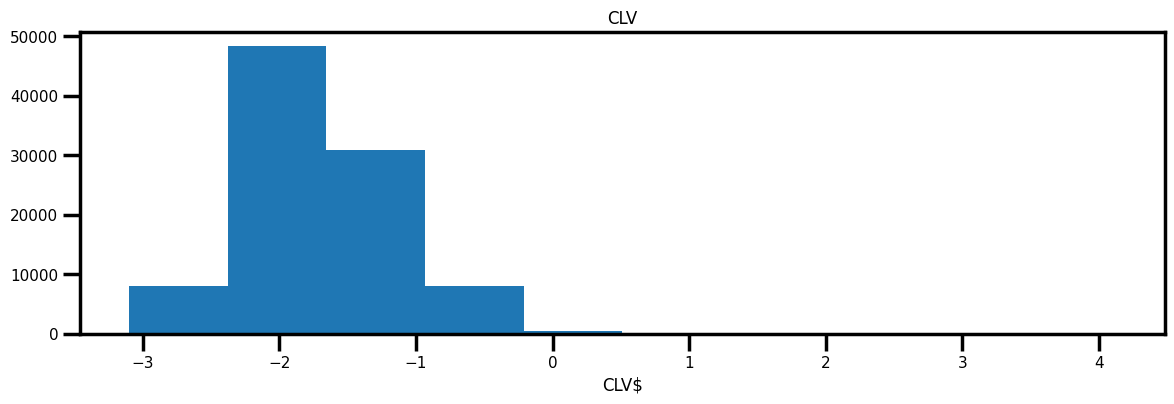

In [77]:
# plot a histogram for clv column of customers_pm dataset (dont miss to use log) 

# give title name as 'CLV'

# give name to x-axis'CLV$'


We dont have to remove negative, in support [flaw-in-customer-lifetime-value](https://hbr.org/2007/12/the-flaw-in-customer-lifetime-value)

# Visualise Recency/Frequency matrix
To examine output of model, can pass mbgf data to plot_frequency_recency_matrix()
* A recency/frequency matrix can show you probability that a 
    * customer is still a customer or is “alive” based on their intra-activity latency, or 
    * gap between orders
* If a customer usually orders every week and hasn’t been seen for a few months, 
    * their probability of being alive is low
* If a customer orders every few months and bought a couple of months ago, 
    * they’re probably still alive

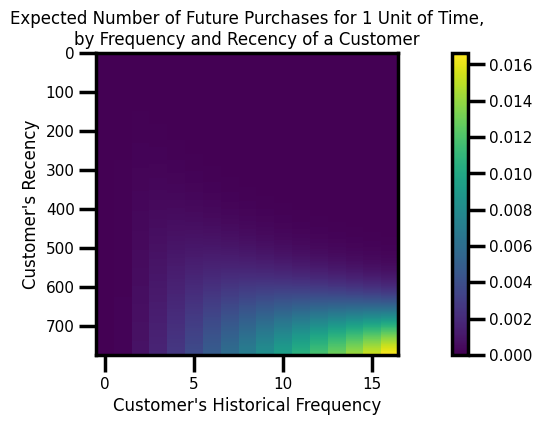

In [78]:
# Plotting recency frequecy matrix as heatmap
## expected transactions in T next units of time by a customer's frequency and recency


from lifetimes.plotting import plot_frequency_recency_matrix

# plot_frequency_recency_matrix

# display plot


A typical recency/frequency matrix shows a long tail at bottom of the matrix
* By above graph customer who has a frequency of appx 10+ and has been a customer for 700+ days when they placed their last order is likely to be alive

## Plotting probability of customers being alive
To identify probability of whether customers are alive, one can use plot_probability_alive_matrix() method and pass it the mbgf data

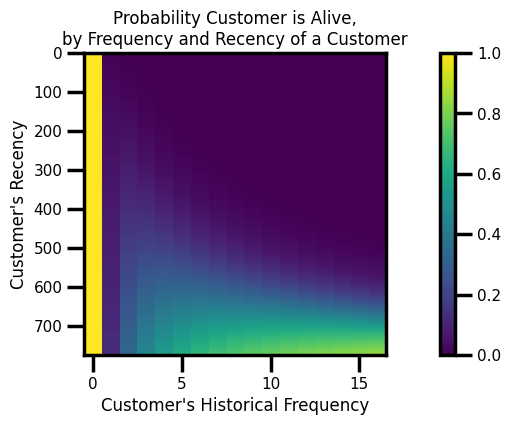

In [79]:
# Plotting probability alive matrix as heatmap
## probability a customer is alive based on their frequency and recency
frequency and recency
from lifetimes.plotting import plot_probability_alive_matrix

# plot plot_probability_alive_matrix

# display plot

customers who have ordered very recently are likely to be alive, and this goes up with the number of orders placed

## Predict which customers will order in next period
The other powerful thing one can do with the MBG/NBD model is predict number of purchases each customer is likely to make over next period
* Setting `t` to be 30 so model predicts number of purchases each customer will make in the next 30 days
    * then output predictions and sort results

In [81]:
# Calculating expected number of repeat purchases up to time t for a randomly chosen individual from dataset
# given they have purchase history (frequency, recency, T)

t = 30
# use conditional_expected_number_of_purchases_up_to_time to find conditional expected number of purchases up to time using bgf model
summary['predicted_purchases'] = 
# short valu by predicted_purchases column and show last 10 observation


,frequency,recency,T,monetary_value,predicted_purchases
id,,,,,
fe81bb32c243a86b2f86fbf053fe6140,4.0,242.0,360.0,381.74500,0.065506
63cfc61cee11cbe306bff5857d00bfe4,5.0,382.0,524.0,135.43200,0.068860
230a1e9f42924d41f37fd22a1d4a9707,2.0,42.0,83.0,69.46000,0.075129
6469f99c1f9dfae7733b25662e7f1782,5.0,282.0,393.0,133.41200,0.086416
ef0103e9602d12594d19c2b666219bc1,2.0,19.0,49.0,84.58000,0.096970
394ac4de8f3acb14253c177f0e15bc58,4.0,236.0,299.0,149.28250,0.114504
ba84da8c159659f116329563a0a981dd,2.0,31.0,52.0,94.63000,0.119096
af5454198a97379394cacf676e1e96cb,2.0,54.0,68.0,197.55000,0.124739
dc813062e0fc23409cd255f7f53c7074,5.0,418.0,473.0,151.60600,0.130981


To determine fit of our MBG/NBD model and probable accuracy of its predictions we can plot data to assess it
* As with the other Lifetimes modules, we just need to pass mbgf output to function with plot_period_transactions() and it will return a MatPlotLib chart showing predictions against actual
* If Actual and Model bars are similar, our model is pretty good at making prediction

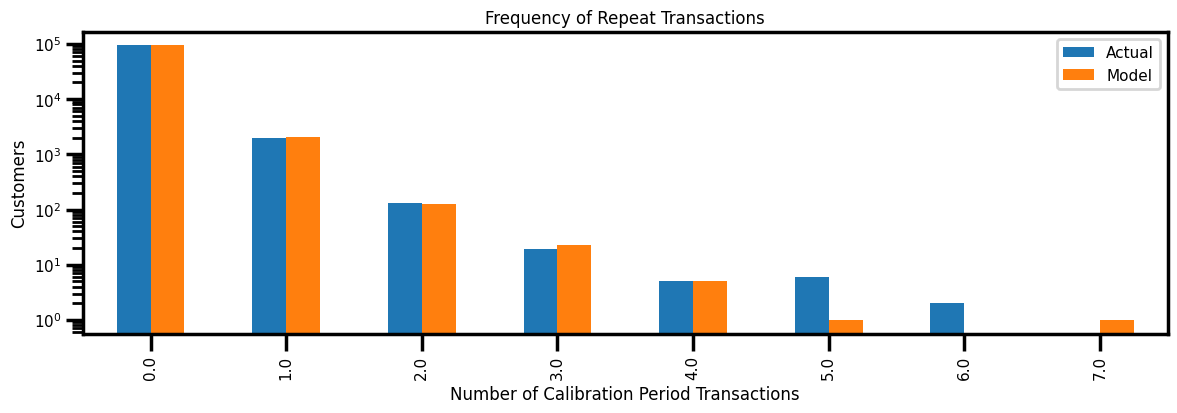

In [82]:
# plott figure with period actual and predicted transactions
# import plot_period_transactions using lifetime

# plot_period_transactions using max frequency = 7 or 6 
ax = 
ax.set_yscale('log')

## Testing model’s predictions with a holdout group
To properly test MBG/NBD model it’s best to create a partitioned dataset 
* Here we will create a calibration period in which to train model and then 
* create a holdout period to validate our model
Model never gets to see data in holdout group, but we can compare accuracy of prediction with the known number of purchases after
model has run

`calibration_and_holdout_data()` function creates that partitioned dataset for us
* It’s much like one we created above, but includes labels relating to frequency, recency, and tenure during calibration, plus the duration of holdout period in days and predicted number of purchases we expect to see within holdout period

In [44]:
# Creating a summary of each customer over a calibration and holdout period by using calibration_and_holdout_data function
## This function creates a summary of each customer over a calibration and holdout period (training and testing, respectively)
### It accepts transaction data and returns a DataFrame of required statistics


# import calibration_and_holdout_data from lifetimes.utils

# Q - understand this code write what you understood out of it
summary_cal_holdout = calibration_and_holdout_data(transaction_data,'id','date',
                                                   calibration_period_end='2018-06-01',#a period to limit calibration inclusive
                                                   observation_period_end='2018-10-17')# final date of study

# see first 5 rows of summary_cal_holdout

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,22.0,0.0,138.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,25.0,0.0,138.0
0000f46a3911fa3c0805444483337064,0.0,0.0,448.0,0.0,138.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,232.0,0.0,138.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,199.0,0.0,138.0


By plotting actual number of purchases in holdout period against model’s predictions we can eyeball model’s accuracy
* For customers who placed three purchases in calibration period, we’d expect to see about 0.3 in holdout period

Q - understand above code line and write what you understood out of it? <br>
`Your Answer: -----`

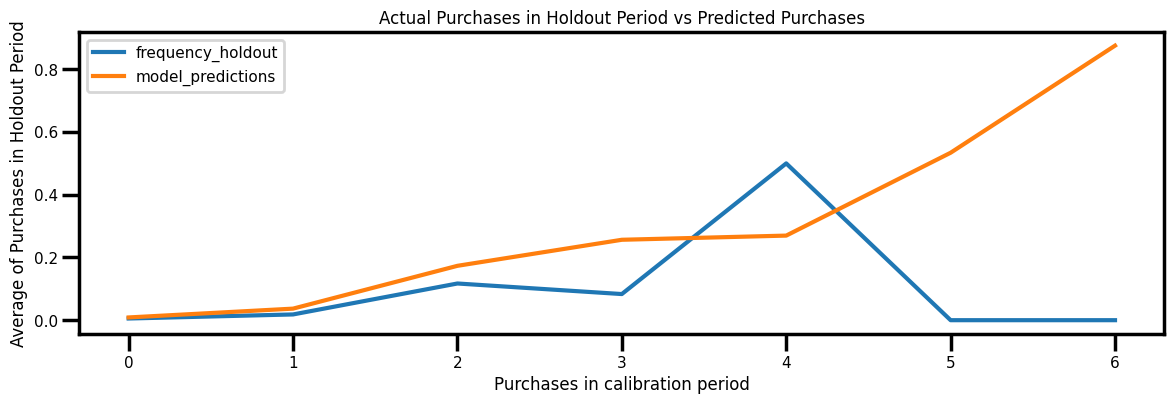

In [45]:
# import plot_calibration_purchases_vs_holdout_purchases from lifetimes.plotting



# fit model
bgf.fit(summary_cal_holdout['frequency_cal'],summary_cal_holdout['recency_cal'],summary_cal_holdout['T_cal'])

#plot calibration_purchases_vs_holdout_purchases to see diff use bgf and summary_cal_holdout

plt.show()

Setting a longer period for holdout might be required to give you more useful predictions, but it depends on dataset and typical frequency with which your customers shop
* If we re-run the model with holdout period set to a year, instead of a few months, we will see that predictions are pretty close to the actual
* One can of course, output data itself in Pandas and re-join it to original data to double-check it on an individual customer level

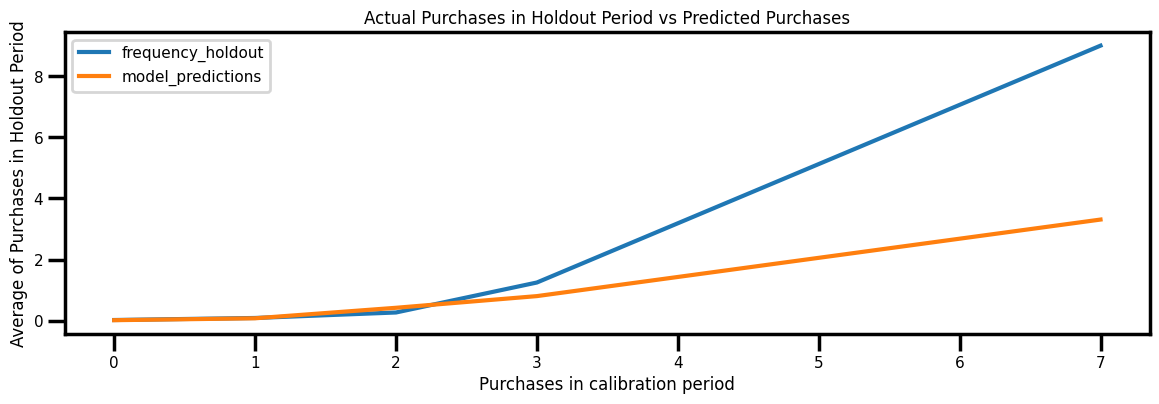

In [46]:
### Creating a summary of each customer over a calibration and holdout period

# import calibration_and_holdout_data using from lifetimes.utils

### Ploting calibration purchases vs holdout. Relies on calibration_and_holdout_data function
# import plot_calibration_purchases_vs_holdout_purchases from lifetimes.plotting

# i guess buy now you know what this code is doing
summary_cal_holdout = calibration_and_holdout_data(transaction_data,'id','date',
                                                   calibration_period_end='2017-10-28',#a period to limit calibration inclusive
                                                   observation_period_end='2018-10-18') # final date of study

bgf.fit(summary_cal_holdout['frequency_cal'],summary_cal_holdout['recency_cal'],summary_cal_holdout['T_cal'])

# plot_calibration_purchases_vs_holdout_purchases using model and summary_cal_holdout
plt.show()

# Predicting Transactions with Time

In [47]:
# getting expected and actual repeated cumulative transactions using expected_cumulative_transactions function
## it Uses the ``expected_number_of_purchases_up_to_time()`` method from fitted model to predict cumulative number of purchases
### More detail, we take only customers who have made their first transaction before specific date and then 
#### multiply them by distribution of ``expected_number_of_purchases_up_to_time()`` for their whole future
##### Doing this for all dates and then summing distributions will give us *complete cumulative purchases*



# import expected_cumulative_transactions from lifetimes.utils 

## by now you have used .date many time Explain what this code is doing
## Explain mathematical formula used
t = (transaction_data.date.max() - transaction_data.date.min()).days #time

df = expected_cumulative_transactions(bgf,transaction_data,'date','id',t)


In [48]:
#@@ expected and actual repeated cumulative transactions
# print any 10 rows of dataframe df


,actual,predicted
146,3,7.172414
613,1615,1554.138311
97,1,4.097708
188,20,27.464833
720,2355,2297.428017
343,259,290.223209
105,1,4.423322
151,4,8.324124
518,1019,974.490249
681,2041,2017.040348


In [49]:
# import mean_squared_error using sklearn.metrics
# import square root using math

#calculating RMSE
sqrt(mean_squared_error(df.actual, df.predicted))

45.28496931279936

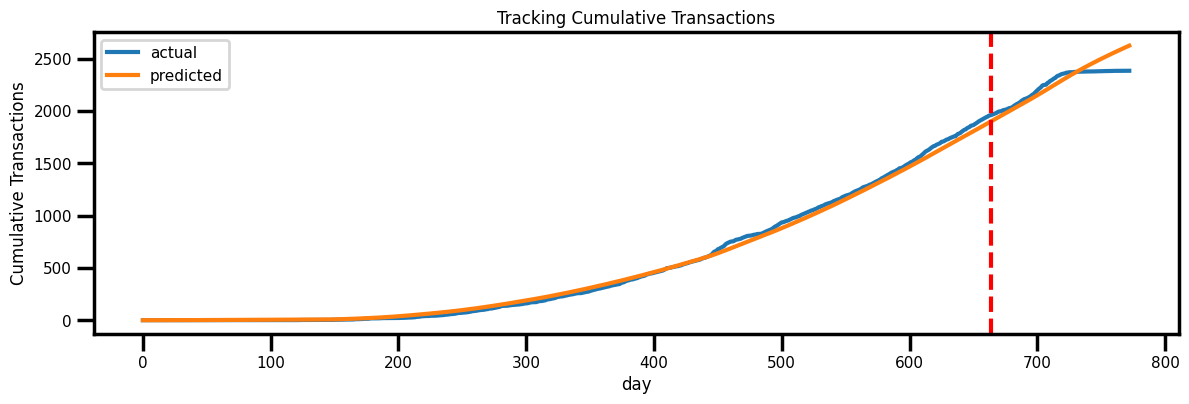

In [51]:
# calibration period

# import datetime

## Plotting a figure of predicted and actual cumulative transactions of users
# import plot_cumulative_transactions using lifetimes.plotting

# strip calibration time '2018-06-30'
## Hint: use datetime
cal = 
#now you know this code if no then understand and comment this out what this code is doing and maths involved in it
t = (transaction_data.date.max() - transaction_data.date.min()).days # time
#what you are understanding with this calibrated time comment it, How this is different from t
t_cal = (cal - transaction_data.date.min()).days

# plot_cumulative_transactions using bgf,transaction_data,'date','id',t,t_cal,freq='D') here D will be Days
plt.show()

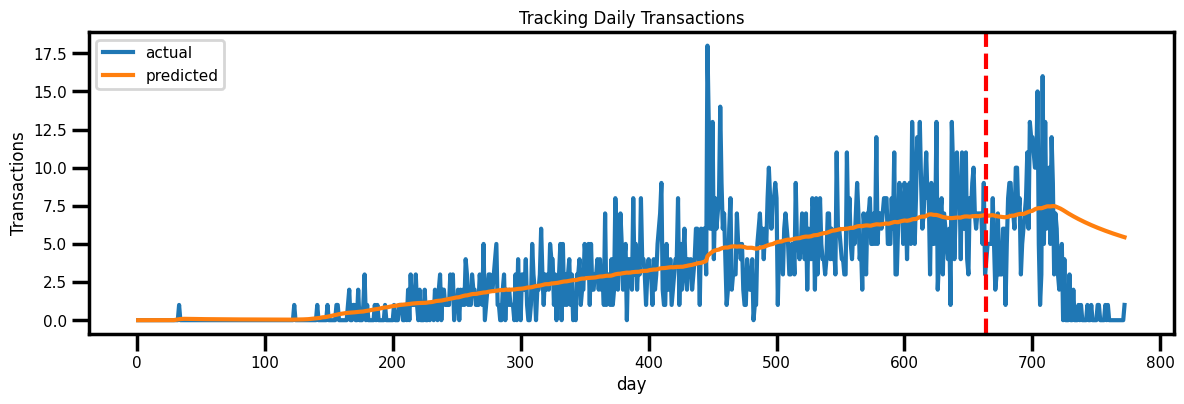

In [52]:
# Plotting a figure of predicted and actual incremental transactions of users

# import plot_incremental_transactions from lifetimes.plotting


# plot_incremental_transactions - this time figureit out what input will it take
plt.show()

# Pred for particular person i.e. id

In [53]:
# access all data values of index-494 of id column for every column of dataset transaction_data
particular_index = 
# print the selected id
particular_index

'18c75282901f7db1fe38e8c9a3ce4c12'

[1.] => probability that customer with id: fe25d225d2494b252321b09821ebdbdf is alive today


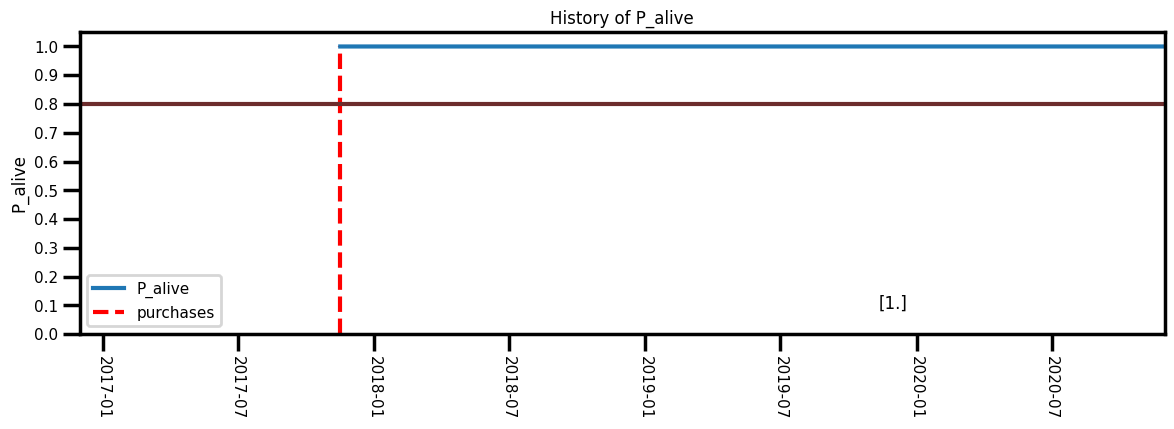

In [54]:
### predicting for individual id


#@@ import date from datetime
#@@ import text from from pylab
 
# for calculating alive path for plotting alive history of user.
## Uses ``conditional_probability_alive()`` method of model to achieve path

#@@ import calculate_alive_path from lifetimes.utils
# for draw a graph showing probability of being alive for a customer in time
#@@ import plot_history_alive from lifetimes.plotting

# select user which is at index 600
particular_index = 
# assign id_ variable particular_index 
id_ = particular_index  
# set time of 365 days
t = 
#collect today date
today = 
#collect two year ago date
two_year_ago =  #today year - 5 i.e 2017
#collect one year from now
one_year_from_now =  #next one year same day and month(yyyy,mm,dd) -1 i.e 2020
# accessing group of rows and columns using loc
sp_trans = transaction_data.loc[transaction_data['id'] == id_]

#new time
t = (today - sp_trans.date.min().date()).days 

## Q- Now again understand this bellow code and comment the maths and your intution 
#use of `calculate_alive_path` from lifetimes.utils
prob_alive_today = pd.DataFrame(calculate_alive_path(bgf,sp_trans,'date',t,freq='D'))[0].tail(1).values 
prob_alive_today = np.round(prob_alive_today[0], 2)
print(f'{prob_alive_today} => probability that customer with id: {id_} is alive today')

t = (one_year_from_now - sp_trans.date.min().date()).days
ax = plot_history_alive(bgf,t,sp_trans,'date',start_date=two_year_ago) #today year - 2
ax.vlines(x=today,ymin=0,ymax=1.05,colors='#6c2c2c')
ax.hlines(y=0.8,xmin=two_year_ago,xmax=one_year_from_now,colors='#6c2c2c')
ax.set_xlim(two_year_ago,one_year_from_now) # sp_trans.order_date.min()
ax.set_ylim(0,1.05)

plt.xticks(rotation=-90)
text(0.75,0.1,prob_alive_today,ha='center',va='center',transform=ax.transAxes) # showing [0.15] => prob_alive_today

plt.show() 

Q - How loc works? <br>
Q - How pd.DataFrame works? <br>
Q - How np.round works? <br>
Q - Why to use vlines,hlines? <br>
Q - Why to use set_xlim,set_xlim? <br>
Q - Why we are using colors='#6c2c2c' not color name? Your thought <br>

Everything have been covered in Course if cannot recall it please go back to the topic or give it a quick search

The more question you will ask yourself, the more answers you will get!!! Mentor is always here to help you if you are stuck.

`Your Answer: -----`